### **1. Import từ điển và từ điển sẽ dùng trong dữ liệu này:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bill = pd.read_excel('Bills.xlsx')

### **2. Lọc dữ liệu:**

In [3]:
bill.head(10)

,_id,customer_id,master_id,country_id,summary.gran _total,summary.discount.money,summary.commission,to_user.location.province_id,to_user.relationship_id,to_user.occasion_id,to_user.relative_id,to_user.date,create_info.created
0,5c8b5c54d6e851942d8b4568,5c8b5c54d6e851942d8b4567,NaN,SG,329000,NaN,NaN,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc6e7256bcb11219005263,2019-01-01,2019-03-15
1,5dea531e9d9b35db3e8b456b,5dea531e9d9b35db3e8b4567,6066c157066c9a03055f2b10,NaN,800000,NaN,NaN,5016fd6b7f8b9ac842000002,NaN,62c684d90c57b1bbda0b886b,62bc698456bcb1121900502f,2019-01-01,2019-12-06
2,5eb6e0549d9b354b6a8b4569,5eb6e0539d9b354b6a8b4567,6066c157066c9a03055f2b10,US,240000,20000.0,20000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc5e2e56bcb11219004b9d,2019-01-01,2020-05-09
3,5c2c9162819a4e681965eb4f,5bf60ee0819a4e76518c6393,6066c157066c9a03055f2b10,VN,500000,NaN,100000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc730756bcb11219005467,2019-01-01,2019-01-02
4,5c2c474b819a4e807165eb28,5c2c474b819a4e807165eb27,6066c157066c9a03055f2b10,DE,540000,NaN,108000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc708256bcb11219005341,2019-01-02,2019-01-02
5,5c2c4a73819a4e703f65eb28,5a5ea602652fe8de52ecb5cf,6066c157066c9a03055f2b10,VN,2000000,NaN,400000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc900756bcb11219006029,2019-01-02,2019-01-02
6,5c2c7f52819a4ebd6565eb21,5c2c7f52819a4ebd6565eb20,6066c157066c9a03055f2b10,VN,1800000,NaN,360000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc707256bcb1121900533a,2019-01-02,2019-01-02
7,5c2c4658819a4e7f0f65eb2c,59d3268c652fe8e06ec0318f,6066c157066c9a03055f2b10,VN,180000,NaN,36000,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bca12156bcb11219006702,2019-01-02,2019-01-02
8,5c2b317b819a4ea94c65ebb5,5b6a64bd652fe873688b463c,6066c157066c9a03055f2b10,VN,1200000,NaN,14879200,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc7d0f56bcb112190058b0,2019-01-02,2019-01-01
9,5c2c496f819a4e7a6165eb33,5c2c496e819a4e7a6165eb32,6066c157066c9a03055f2b10,IT,1500000,NaN,15996800,5016fd6b7f8b9ac842000000,NaN,62c684d90c57b1bbda0b886b,62bc707a56bcb1121900533e,2019-01-02,2019-01-02


#### **2.1 Thống kê các dạng dữ liệu trong Cơ sở**

In [4]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   _id                           6601 non-null   object        
 1   customer_id                   6601 non-null   object        
 2   master_id                     6451 non-null   object        
 3   country_id                    6293 non-null   object        
 4    summary.gran _total          6601 non-null   int64         
 5   summary.discount.money        5803 non-null   float64       
 6    summary.commission           6163 non-null   object        
 7   to_user.location.province_id  6573 non-null   object        
 8   to_user.relationship_id       680 non-null    object        
 9   to_user.occasion_id           6601 non-null   object        
 10  to_user.relative_id           5860 non-null   object        
 11  to_user.date                  

#### **2.2. Lọc dữ liệu của đề bài**

##### Replace những dữ liệu "-" trong cột summary.gran _total và chuyển để về dạng numeric - gặp dữ liệu trống sẽ chuyển thành NaN

In [5]:
bill[' summary.gran _total '] = bill[' summary.gran _total '].replace('-','')
bill[' summary.gran _total '] = bill[' summary.gran _total '].apply(pd.to_numeric, errors = 'coerce')
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   _id                           6601 non-null   object        
 1   customer_id                   6601 non-null   object        
 2   master_id                     6451 non-null   object        
 3   country_id                    6293 non-null   object        
 4    summary.gran _total          6601 non-null   int64         
 5   summary.discount.money        5803 non-null   float64       
 6    summary.commission           6163 non-null   object        
 7   to_user.location.province_id  6573 non-null   object        
 8   to_user.relationship_id       680 non-null    object        
 9   to_user.occasion_id           6601 non-null   object        
 10  to_user.relative_id           5860 non-null   object        
 11  to_user.date                  

##### Xem các Outlier trong dữ liệu

<Axes: ylabel=' summary.gran _total '>

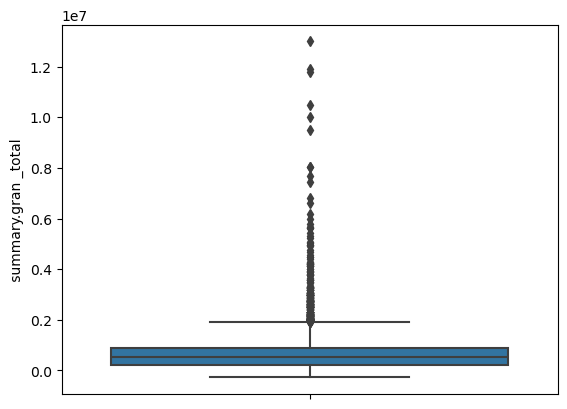

In [6]:
sns.boxplot(y= ' summary.gran _total ', data=bill)

Để không làm loạn dữ liệu và đưa ra các quyết định không chính xác nên vẫn giữa các outlier có giá trị lớn và tạm loại bỏ các hàng có giá trị NaN

In [7]:
bill_cleaned = bill.dropna(subset=[' summary.gran _total '])

Theo hoàn cảnh của đề tài ta sẽ fill các giá trị NaN ở cột "summary.discount.money" bằng 0 coi như ở các giao dịch đó chúng ta ko có giảm giá

In [8]:
bill_cleaned['summary.discount.money'].fillna(0, inplace=True)

Vì theo đề bài ở cột Comission còn có những doanh thu khác nên khi comission cao hơn Gran_total là có thể nên giữ nguyên cột này

#### **2.3. Vẽ biểu đồ Histogram với đường KDE với phân phối xác xuất của cột summary.gran _total**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' summary.gran _total ', ylabel='Count'>

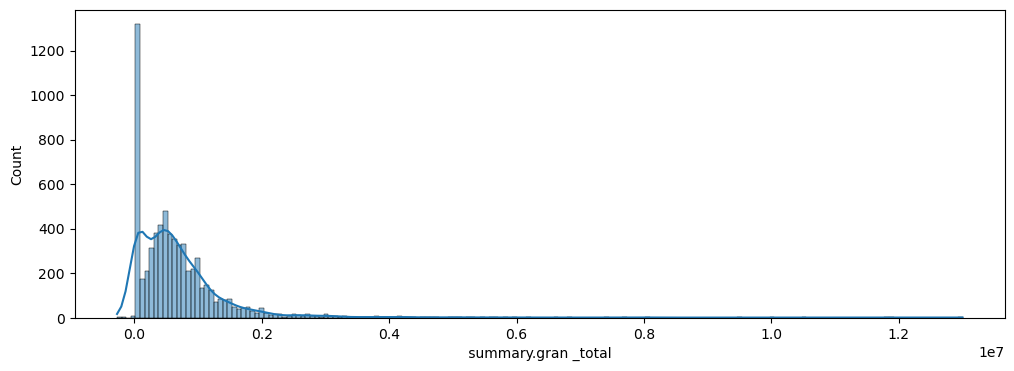

In [9]:
color_palette = ['#FF5733']
plt.figure(figsize=(12,4))
sns.histplot(bill_cleaned[' summary.gran _total '], kde= True)

#### **2.4. Sort và Reset index**

In [10]:
bill_cleaned.sort_values(' summary.gran _total ', ascending=False,inplace=True)
bill_cleaned.reset_index(inplace=True)
bill_cleaned

,index,_id,customer_id,master_id,country_id,summary.gran _total,summary.discount.money,summary.commission,to_user.location.province_id,to_user.relationship_id,to_user.occasion_id,to_user.relative_id,to_user.date,create_info.created
0,1083,5e7c6b0d9d9b35f4148b456a,5e393bc79d9b35164d8b4567,6066c157066c9a03055f2b10,NaN,13000000,0.0,2600000,5016fd6c7f8b9ac842000033,NaN,62b44615e7faf931dd003dd6,62bc678556bcb11219004f4e,2020-04-03,2020-03-26
1,210,5c458cc0819a4eb57b750220,5c458cc0819a4eb57b75021c,6066c157066c9a03055f2b10,GB,11900000,0.0,NaN,5016fd6b7f8b9ac842000000,NaN,62b44615e7faf931dd003dd6,62bc6ef756bcb1121900529c,2019-01-24,2019-01-21
2,138,5c3e8880819a4ebb2903bb1c,5bea9a22819a4ef7448be429,6066c157066c9a03055f2b10,VN,11800000,0.0,19248000,5016fd6b7f8b9ac842000000,NaN,62b44615e7faf931dd003dd6,62bc743856bcb112190054f1,2019-01-15,2019-01-16
3,188,5c402442819a4edf5e1d7681,5c400405819a4ef8321d767f,6066c157066c9a03055f2b10,VN,10500000,0.0,20365600,5016fd6b7f8b9ac842000000,NaN,62b44615e7faf931dd003dd6,62bc6f4156bcb112190052ba,2019-01-22,2019-01-17
4,6419,65279df6b85e11ce660e1143,64f92b9b3cccbc873a0a6982,6066cdb37c6e026dce0e3b31,VN,10022400,0.0,2280000,5016fd6b7f8b9ac842000000,NaN,623807474305c8586b23155b,64f92bb06367922c4d06d611,2023-10-19,2023-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6596,1057,5e6f5d569d9b352b618b4569,5d9adf839d9b35e5318b4567,NaN,NaN,15000,0.0,-,NaN,NaN,62b44615e7faf931dd003dd6,NaN,2020-03-16,2020-03-16
6597,1313,5ed5b9439d9b35cc2a8b4568,5ed4d2089d9b35f02c8b4567,6066c157066c9a03055f2b10,VN,8800,342000.0,-,5016fd6b7f8b9ac842000000,NaN,623807c5662d9e386d783c05,62bc5b2f56bcb11219004a50,2020-06-02,2020-06-02
6598,530,5d4bf6ae225a38b42b8b456d,5d4bf6ad225a38b42b8b456b,6066c157066c9a03055f2b10,NaN,-40000,1000000.0,NaN,5016fd6b7f8b9ac842000000,NaN,62b44615e7faf931dd003dd6,62bc6c0756bcb1121900514f,2019-08-09,2019-08-08
6599,597,5daaf50c9c3733da058b4569,5daaa3809c3733fe5b8b4569,6066c157066c9a03055f2b10,VN,-194000,1000000.0,10205600,5016fd6c7f8b9ac842000026,NaN,623807474305c8586b23155b,62bc6a7356bcb11219005098,2019-10-20,2019-10-19


### **3. THỰC HIỆN TẠO RFM VÀ DÙNG K-MEAN ĐỂ PHÂN LOAỊ NHÓM KHÁCH HÀNG**

#### **3.1. Chuyển cột create_info.created thành datetime và tạo thành 3 tiêu chí R F M**

In [11]:
import datetime 
current_day = max(bill_cleaned['create_info.created']) + datetime.timedelta(days=1)

df_customers = bill_cleaned.groupby(['customer_id']).agg(
    {'create_info.created' : lambda x: (current_day -x.max()).days,
     '_id': 'count',
     ' summary.gran _total ' :'sum'    
    }
)
df_customers.rename(columns={'create_info.created':'R', '_id':'F', ' summary.gran _total ':'M'}, inplace =True)

**Các tiêu chí R F M ta cần kết hợp dữ liệu của 4 cột thông qua ".groupby". Ở trường hợp trên là kết hợp cốt "customer_id" với điều kiện thông qua ".agg"**

1. Đầu tiên, "create_info.created" sẽ được tạo hàm lambda để tính toán số ngày giữa current_day và ngày lớn nhất trong cột 'create_info.created' của mỗi nhóm.

2. Tiếp theo, là đếm thông qua hàm count của cột "_id".

3. cuối cùng là tính tổng số tiền đã mua.

In [12]:
df_customers

,R,F,M
customer_id,,,
570c96987f8b9a2c0f3776b8,1458,32,34887000
571c3c1d7f8b9ae9557fd9c5,348,54,51014000
572043f77f8b9aaa457fd9f0,1544,1,350000
57298d227f8b9a197972166c,1674,4,2093000
5760604d7f8b9aa6137705e8,1736,1,593000
...,...,...,...
65334e6a1f53361b710da7c7,3,1,340200
6534c923b389fcc1f10b41e8,2,1,970000
65350ae183b945e45308ccd2,2,1,800000


#### **3.2 Vẽ và chuyển đổi dữ liệu**

#### Vẽ đồ thị Phân Phối của Recency, Frequency và Monetary

/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ipykernel_15333/2765132803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers['R'], ax=ax[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ipykernel_15333/2765132803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

<Axes: xlabel='M', ylabel='Density'>

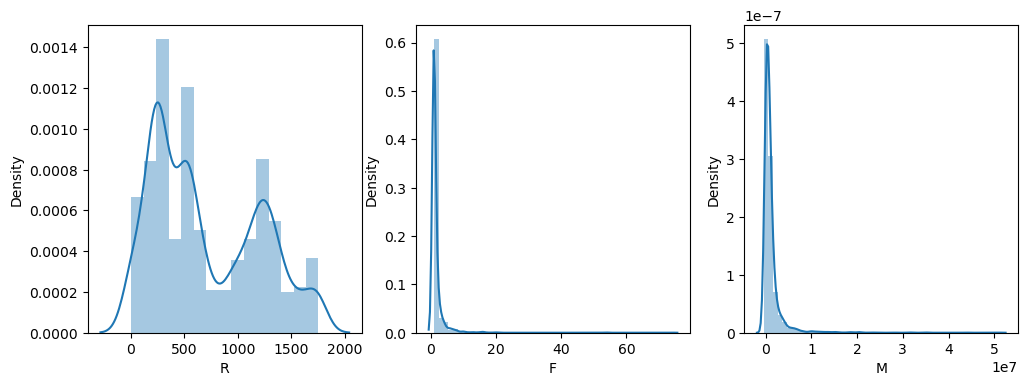

In [13]:
fig, ax = plt.subplots( 1, 3, figsize=(12,4))
sns.distplot(df_customers['R'], ax=ax[0])
sns.distplot(df_customers['F'], ax=ax[1])
sns.distplot(df_customers['M'], ax=ax[2])

#### **Chuyển đổi dữ liệu và check hàm chuyển đổi dữ liệu ổn nhất cho đồng bộ - phân phối dẹp hơn**

#### Dùng 2 cách sử dụng chuyển đổi thông dụng là log và căng để chuyenẻ đổi dữ liệu và xem độ lệch chuẩn có hiệu quả không?

In [14]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(3, 1, figsize=(12,7))
    sns.distplot(df_customers[x], ax=ax[0])
    sns.distplot(np.log(df_customers[x]), ax=ax[1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[2])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))

/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ipykernel_15333/3670035870.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers[x], ax=ax[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ipykernel_15333/3670035870.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

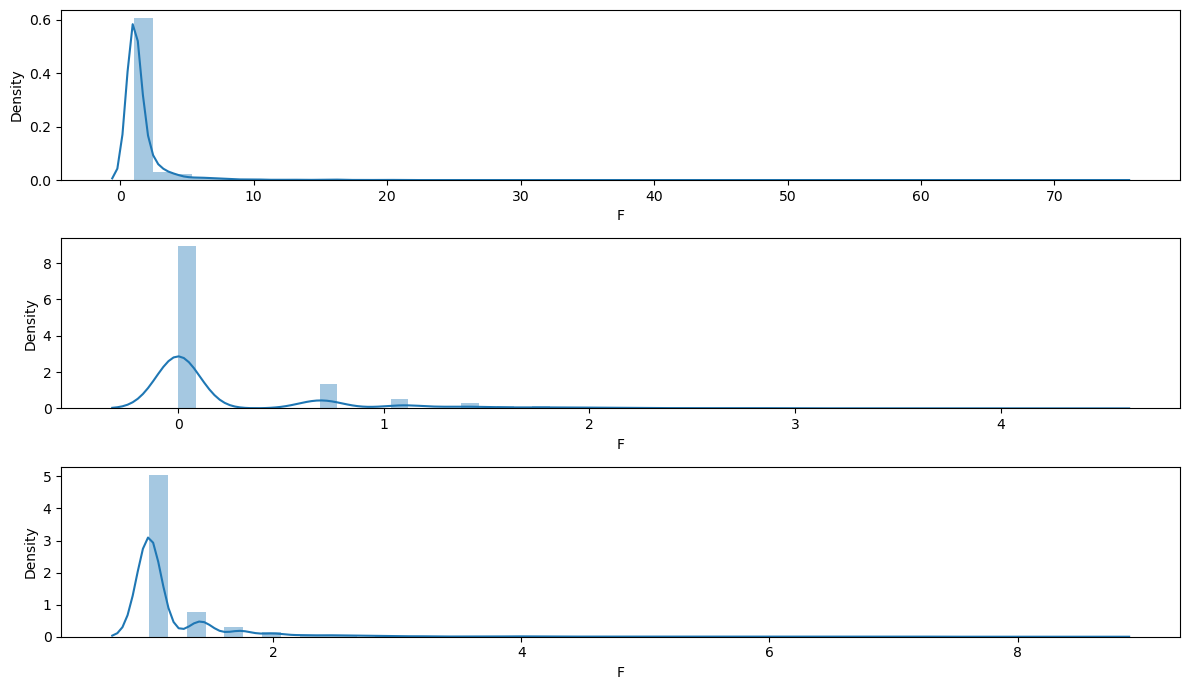

12.39
2.55
4.99


In [15]:
analyze_skewness('F')

**=> Từ đó ta thấy log có độ lệch chuẩn tốt nhất**

#### Vẽ đồ thị xem phân phối sau khi chuyển đổi dữ liệu

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ipykernel_15333/1183818267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_customers_log['R'], ax=ax[0])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/qc/5w1l4vy56s32xn68q8_x3wk40000gn/T/ip

<Axes: xlabel='M', ylabel='Density'>

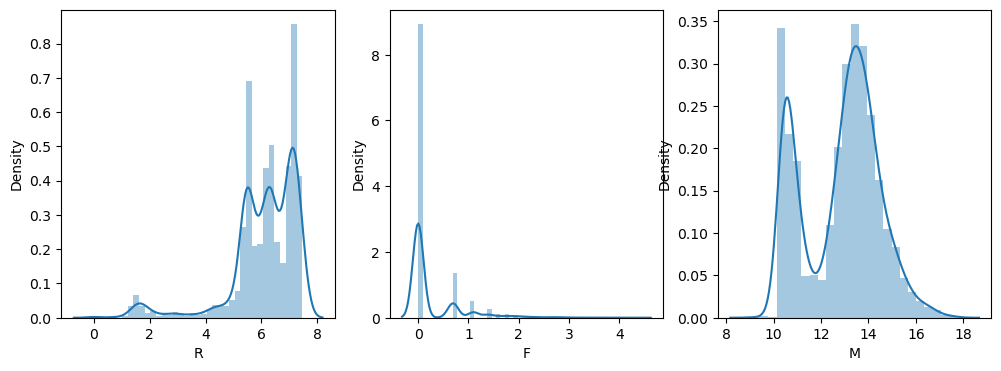

In [16]:
df_customers_log = np.log(df_customers)
fig, ax = plt.subplots( 1, 3, figsize=(12,4))
sns.distplot(df_customers_log['R'], ax=ax[0])
sns.distplot(df_customers_log['F'], ax=ax[1])
sns.distplot(df_customers_log['M'], ax=ax[2])

#### **Chuẩn hoá một lần nữa thông qua chuẩn hoá Scaler**

Tìm điểm K phù hợp để chạy mô hình K-mean


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

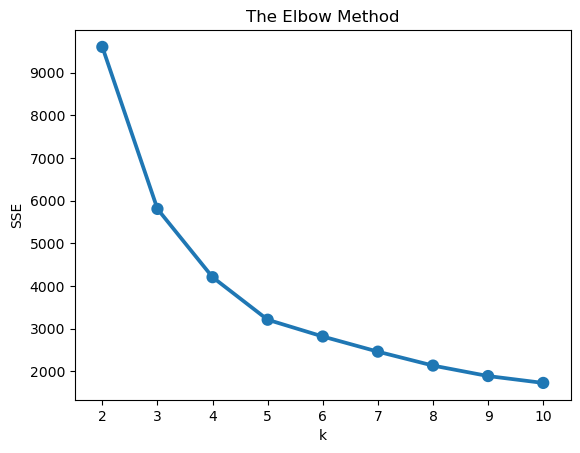

In [17]:
from sklearn.cluster import KMeans
df_customers_t = df_customers_log.fillna(df_customers_log.mean())

sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### <span style="color:red"> **K = 06**

#### **Chạy mô hình Kmean với K=06**

In [18]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(df_customers_t)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

**=> Tạo thành 6 nhóm từ đó ta tạo cốt mới có label là Cluster để phân loại khách hàng**

In [19]:
df_customers['Cluster']= model.labels_
df_customers.head(10)

,R,F,M,Cluster
customer_id,,,,
570c96987f8b9a2c0f3776b8,1458,32,34887000,3
571c3c1d7f8b9ae9557fd9c5,348,54,51014000,3
572043f77f8b9aaa457fd9f0,1544,1,350000,4
57298d227f8b9a197972166c,1674,4,2093000,2
5760604d7f8b9aa6137705e8,1736,1,593000,4
57677b207f8b9a2b763b525a,1319,1,483000,4
57700cd07f8b9a04150fa788,1093,1,514000,4
57769ac27f8b9a5a328b4586,1729,1,1500000,2
57809f577f8b9ab70fca5111,1606,1,340000,4


### **4. DÙNG CÁC PHÉP TÍNH VÀ ĐỒ THỊ PHỤC VỤ CHO BÀI REPORT**

#### Tính trung bình của từng Cluster để chia thành các nhóm phân loại

In [28]:
df_customers.groupby('Cluster').agg(
    {
        'R':'mean',
        'F':'mean',
        'M':'mean'
    }
).round(2)

,R,F,M
Cluster,,,
0,567.12,1.06,47934.18
1,261.38,1.27,754751.08
2,1119.06,1.51,1635156.00
3,525.75,6.23,6008125.77
4,1152.40,1.07,513927.27
5,9.48,3.15,2283037.01


In [21]:
df_customers.groupby('Cluster').mean().round(2)

,R,F,M
Cluster,,,
0,567.12,1.06,47934.18
1,261.38,1.27,754751.08
2,1119.06,1.51,1635156.00
3,525.75,6.23,6008125.77
4,1152.40,1.07,513927.27
5,9.48,3.15,2283037.01


In [22]:
bill['year'] = bill['to_user.date'].dt.year
bill.tail()

,_id,customer_id,master_id,country_id,summary.gran _total,summary.discount.money,summary.commission,to_user.location.province_id,to_user.relationship_id,to_user.occasion_id,to_user.relative_id,to_user.date,create_info.created,year
6596,6534c94d26d2861fd7055847,6534c923b389fcc1f10b41e8,61e7fc43b347830b69615e42,VN,970000,0.0,180000,5016fd6b7f8b9ac842000006,NaN,62b44615e7faf931dd003dd6,62b59927eb80e3a3fa0dd5ae,2023-10-25,2023-10-22,2023
6597,6530bcdc86e62678f50869fe,652e5573daadba6c56030412,6066c157066c9a03055f2b10,ID,560000,0.0,50000,5016fd6c7f8b9ac84200003e,62374d66be2ae82baf48b53e,62374e382511770c643d9a5a,6530bcd5f38e1d80e004d199,2023-10-26,2023-10-19,2023
6598,653012f35a71a6fb57072286,6530111256105e50b708150a,6066c157066c9a03055f2b10,SG,592920,0.0,143720,5016fd6c7f8b9ac84200000f,62b43ee94a645a789f05dac2,62374e382511770c643d9a5a,653012eaee69caab450eba24,2023-10-28,2023-10-18,2023
6599,6533e318a9b6a560b40835c6,652b8042ae8a3f22ce073acf,6066cd65ca52cc506817d471,JP,765000,0.0,201200,5016fd6b7f8b9ac842000000,62b43ee94a645a789f05dac2,62374e382511770c643d9a5a,652b806ff56b05e9020dbe4e,2023-10-28,2023-10-21,2023
6600,65350d5cc0607c421f048a74,6530111256105e50b708150a,6066c157066c9a03055f2b10,SG,1296000,0.0,326000,5016fd6c7f8b9ac84200000f,62b43ee94a645a789f05dac2,623807474305c8586b23155b,65350d5483f17ca9fb0ad86b,2023-10-28,2023-10-22,2023


In [23]:
bill_group = bill[[' summary.gran _total ', 'year']].groupby('year').median()
bill_group.head()

,summary.gran _total
year,
2019,620000.0
2020,590000.0
2021,682000.0
2022,453600.0
2023,380000.0


#### Tách từ cột thời gian theo năm thông qua cột "to_user.date" vì đã chuyển về datetime nên chúng chỉ cần dùng từ điển datetime.year để tách

In [24]:
bill['year'] = bill['to_user.date'].dt.year
bill.tail()

,_id,customer_id,master_id,country_id,summary.gran _total,summary.discount.money,summary.commission,to_user.location.province_id,to_user.relationship_id,to_user.occasion_id,to_user.relative_id,to_user.date,create_info.created,year
6596,6534c94d26d2861fd7055847,6534c923b389fcc1f10b41e8,61e7fc43b347830b69615e42,VN,970000,0.0,180000,5016fd6b7f8b9ac842000006,NaN,62b44615e7faf931dd003dd6,62b59927eb80e3a3fa0dd5ae,2023-10-25,2023-10-22,2023
6597,6530bcdc86e62678f50869fe,652e5573daadba6c56030412,6066c157066c9a03055f2b10,ID,560000,0.0,50000,5016fd6c7f8b9ac84200003e,62374d66be2ae82baf48b53e,62374e382511770c643d9a5a,6530bcd5f38e1d80e004d199,2023-10-26,2023-10-19,2023
6598,653012f35a71a6fb57072286,6530111256105e50b708150a,6066c157066c9a03055f2b10,SG,592920,0.0,143720,5016fd6c7f8b9ac84200000f,62b43ee94a645a789f05dac2,62374e382511770c643d9a5a,653012eaee69caab450eba24,2023-10-28,2023-10-18,2023
6599,6533e318a9b6a560b40835c6,652b8042ae8a3f22ce073acf,6066cd65ca52cc506817d471,JP,765000,0.0,201200,5016fd6b7f8b9ac842000000,62b43ee94a645a789f05dac2,62374e382511770c643d9a5a,652b806ff56b05e9020dbe4e,2023-10-28,2023-10-21,2023
6600,65350d5cc0607c421f048a74,6530111256105e50b708150a,6066c157066c9a03055f2b10,SG,1296000,0.0,326000,5016fd6c7f8b9ac84200000f,62b43ee94a645a789f05dac2,623807474305c8586b23155b,65350d5483f17ca9fb0ad86b,2023-10-28,2023-10-22,2023


#### check lại thông tin của các cột dữ liệu

In [25]:
bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   _id                           6601 non-null   object        
 1   customer_id                   6601 non-null   object        
 2   master_id                     6451 non-null   object        
 3   country_id                    6293 non-null   object        
 4    summary.gran _total          6601 non-null   int64         
 5   summary.discount.money        5803 non-null   float64       
 6    summary.commission           6163 non-null   object        
 7   to_user.location.province_id  6573 non-null   object        
 8   to_user.relationship_id       680 non-null    object        
 9   to_user.occasion_id           6601 non-null   object        
 10  to_user.relative_id           5860 non-null   object        
 11  to_user.date                  

#### Vẽ hàm phân phối để thấy được tổng giá trị đơn hàng theo năm, phúc vụ cho bài report

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' summary.gran _total ', ylabel='Count'>

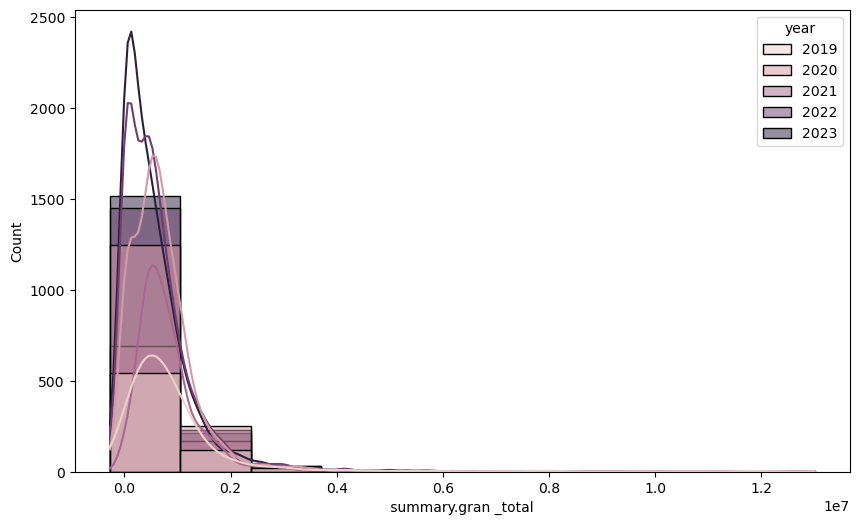

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=bill, x=' summary.gran _total ', hue='year', bins=10, alpha=0.5, kde=True)